# Interactive Plotting and Monte Carlo simulations of CPPI

In [17]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## GBM interactive Plots

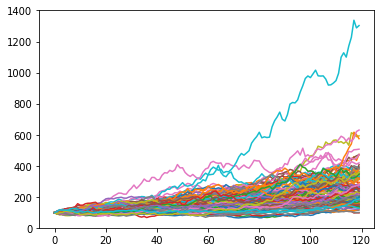

In [18]:
erk.gbm(10,100, mu=0.1).plot(legend=False)

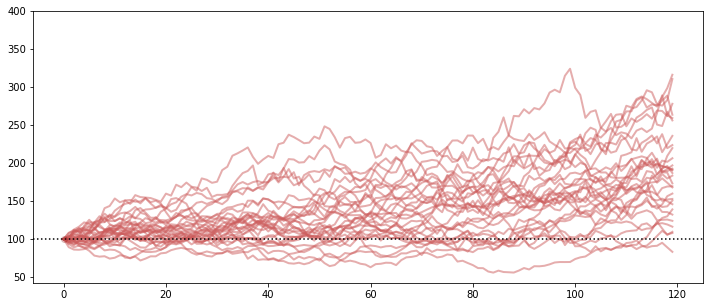

In [35]:
show_gbm(30,0.07,0.15)

In [36]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian motion model (GBM)
    """
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0 = s_0)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    # draw a dot at the origin
    ax.plot(0,s_0, marker="o", color="darkred", alpha=0.2)
    

In [37]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios = (1,20,1),
                                   mu = (-.2,0.2,0.01),
                                   sigma =(0,.3,.01)
                                  )

In [38]:
display(gbm_controls)

A Jupyter Widget

In [39]:
gbm_controls = widgets.interactive(erk.show_gbm,
                                   n_scenarios = (1,20,1),
                                   mu = (-.2,0.2,0.01),
                                   sigma =(0,.3,.01)
                                  )
display(gbm_controls)

A Jupyter Widget

## Interactive CPPI Simulation - Monte Carlo

In [45]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the resukts of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    #ru the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
    
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios = widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max = widgets.IntSlider(min=0, max=100, step=1, value=100, description = "Zoom Y Axis")
                                   )
display(cppi_controls)
    

A Jupyter Widget